In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,  precision_recall_curve, auc

   NAME V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16
0     1  n  y  n  y  y  y  n  n  n   y       y   y   y   n   y
1     1  n  y  n  y  y  y  n  n  n   n   n   y   y   y   n    
2     0     y  y     y  y  n  n  n   n   y   n   y   y   n   n
3     0  n  y  y  n     y  n  n  n   n   y   n   y   n   n   y
4     0  y  y  y  n  y  y  n  n  n   n   y       y   y   y   y
Matriz de Confusión:
[[31 10]
 [ 2 22]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        41
           1       0.69      0.92      0.79        24

    accuracy                           0.82        65
   macro avg       0.81      0.84      0.81        65
weighted avg       0.85      0.82      0.82        65



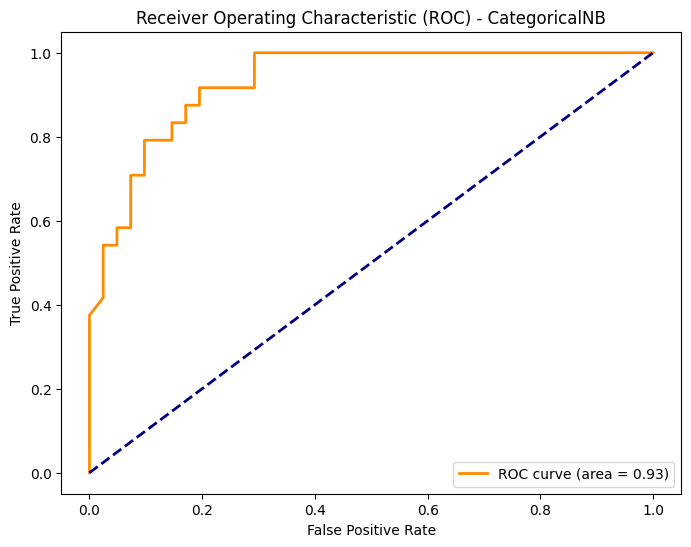

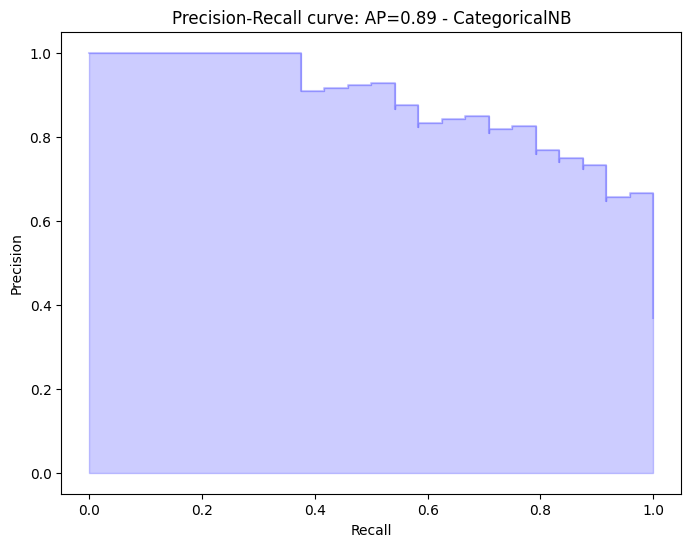

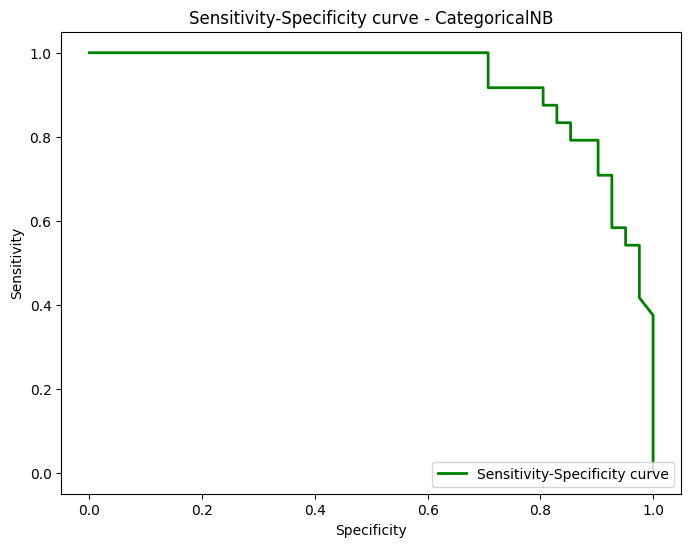

In [ ]:
vote_data = pd.read_csv("house-votes-84.data", header=None, na_values="?")
header = ["NAME", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16"]
vote_data.columns = header

# Quitamos los elementos NaN
vote_data = vote_data.fillna("")

# Convertimos el nombre a categórico
vote_data["NAME"] = LabelEncoder().fit_transform(vote_data["NAME"])

# Display the DataFrame
print(vote_data.head())

# Dividimos los datos entre entrenamiento y test
vote_raw_train = vote_data[0:370]
vote_raw_test = vote_data[370:]

# Crear un modelo de clasificación Naive Bayes
laplace_value = 1
nb_classifier = CategoricalNB(alpha=laplace_value)

# Entrenar el modelo con los datos de entrenamiento
X_train = vote_raw_train.drop("NAME", axis=1)
y_train = vote_raw_train["NAME"]
X_train = pd.get_dummies(X_train)
nb_classifier.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
X_test = vote_raw_test.drop("NAME", axis=1)
y_test = vote_raw_test["NAME"]
X_test = pd.get_dummies(X_test)
y_pred = nb_classifier.predict(X_test)

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de Confusión:")
print(metrics.confusion_matrix(y_test, y_pred))

print("\nInforme de Clasificación:")
print(metrics.classification_report(y_test, y_pred))

# Obtener probabilidades predichas para las clases positivas
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - CategoricalNB')
plt.legend(loc="lower right")
plt.show()

# Curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
average_precision = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={:.2f} - CategoricalNB'.format(average_precision))
plt.show()

# Curva Sensitivity-Specificity
fpr_ss, tpr_ss, thresholds_ss = roc_curve(y_test, y_prob, pos_label=1)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

plt.figure(figsize=(8, 6))
plt.plot(1-fpr_ss, tpr_ss, color='green', lw=2, label='Sensitivity-Specificity curve')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Sensitivity-Specificity curve - CategoricalNB')
plt.legend(loc="lower right")
plt.show()